https://github.com/zaidhabeb/machine_learning_exe3

zaid habiballah - 322513433

Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [63]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data



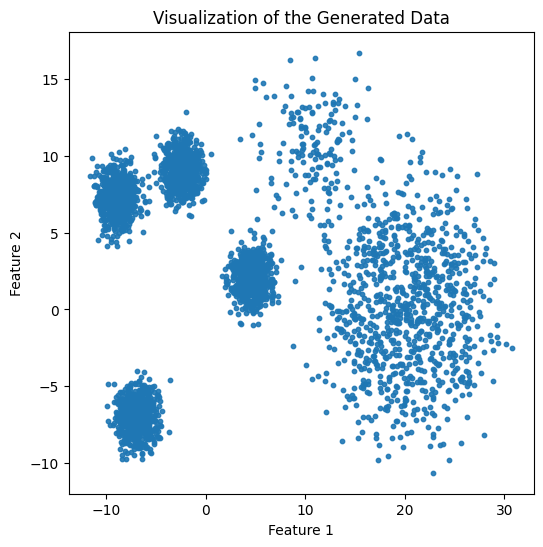

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Call create_data
X = create_data(2.5, 3000, 150, 900, 750)

# Data visualization
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.9)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of the Generated Data")
plt.show()


3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

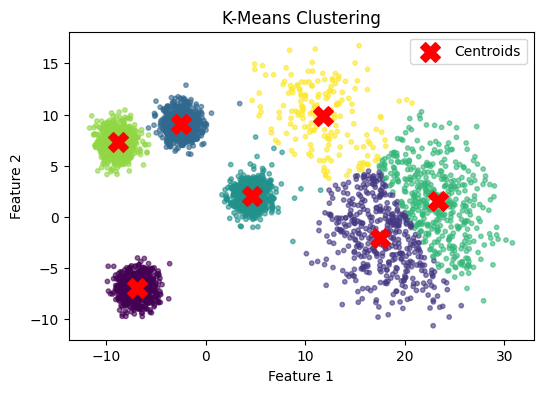

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate dataset
X = create_data(2.5, 3000, 150, 900, 750)

# Train K-Means
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans.fit(X)

# Visualize the clustering
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

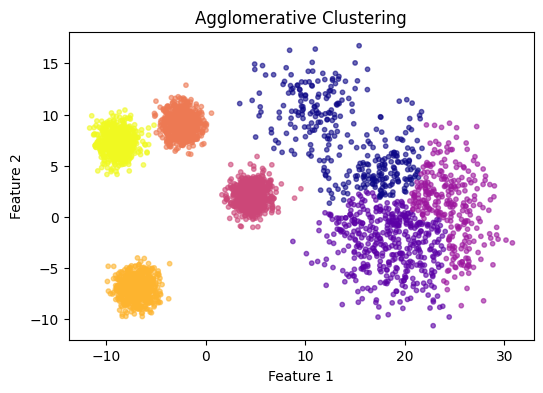

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Generate dataset
X = create_data(2.5, 3000, 150, 900, 750)

# Train Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=7)
agglo.fit(X)

# Visualize the clustering
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=agglo.labels_, cmap='plasma', s=10, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Clustering")
plt.show()


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


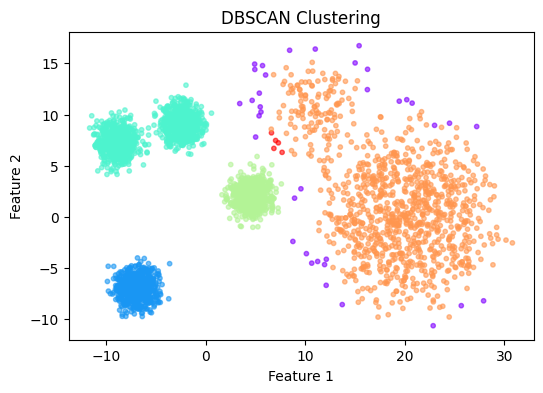

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate dataset
X = create_data(2.5, 3000, 150, 900, 750)

# Train DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=7)
dbscan.fit(X)

# Visualize the clustering
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='rainbow', s=10, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.show()


6. Compare the results and choose the best method for the data


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generate dataset
X = create_data(2.5, 3000, 150, 900, 750)

# Define models
models = {
    "K-Means": KMeans(n_clusters=7, random_state=42, n_init=10),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=7),
    "Agglomerative": AgglomerativeClustering(n_clusters=7)
}

# Store results
results = {}

# Train & Evaluate Models
for name, model in models.items():
    labels = model.fit_predict(X)

    # Ensure the model created at least 2 clusters (DBSCAN can return -1 for noise)
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
    else:
        silhouette = -1  # Invalid clustering case

    results[name] = silhouette

# Print results
print("Silhouette Score Comparison of Clustering Models:\n")
for name, silhouette in results.items():
    print(f"{name}: Silhouette Score = {silhouette:.4f}")

# Determine the best model based on silhouette score
best_model = max(results, key=results.get)
print(f"\nBest model based on Silhouette Score: {best_model}")


Silhouette Score Comparison of Clustering Models:

K-Means: Silhouette Score = 0.6755
DBSCAN: Silhouette Score = 0.5883
Agglomerative: Silhouette Score = 0.6640

Best model based on Silhouette Score: K-Means
